In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import librosa
import librosa.display
from IPython.display import Audio
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('audio_meta.csv')
df = df.drop(df.columns[[0]], axis=1)
df.head(3)

,file,class_id,class,Xmfcc
0,Emotions\Angry\03-01-05-01-01-01-01.wav,1,Angry,[-4.9088266e+02 5.4259251e+01 -7.4870567e+00 ...
1,Emotions\Angry\03-01-05-01-01-01-02.wav,1,Angry,[-5.2676392e+02 5.2980289e+01 -1.3038193e+01 ...
2,Emotions\Angry\03-01-05-01-01-01-03.wav,1,Angry,[-5.5453198e+02 7.5447372e+01 2.6228604e+00 ...


In [4]:
df['class'].value_counts()

Angry        2167
Happy        2167
Sad          2167
Fearful      2047
Disgusted    1863
Neutral      1795
Name: class, dtype: int64

<AxesSubplot:xlabel='class', ylabel='count'>

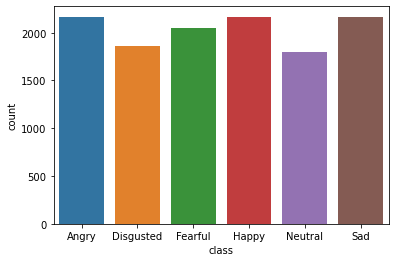

In [5]:
sns.countplot(df['class'])

In [5]:
df['class'].value_counts()

Angry        2167
Happy        2167
Sad          2167
Fearful      2047
Disgusted    1863
Neutral      1795
Name: class, dtype: int64

In [6]:
def waveplot(data,sr,emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion ,size=20)
    librosa.display.waveshow(data,sr=sr)
    plt.show()

def spectogram(data,sr,emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(10,4))
    plt.title(emotion,size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

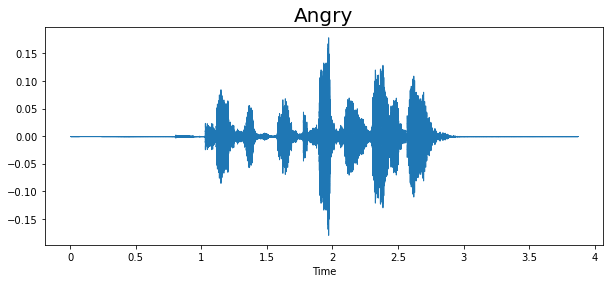

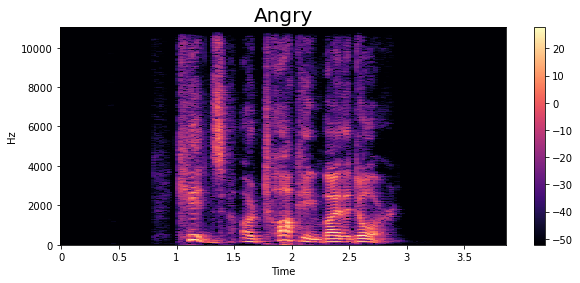

In [7]:
emotion = 'Angry'
path = 'Emotions/Angry/03-01-05-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

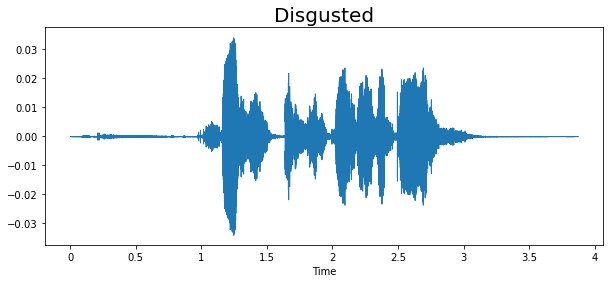

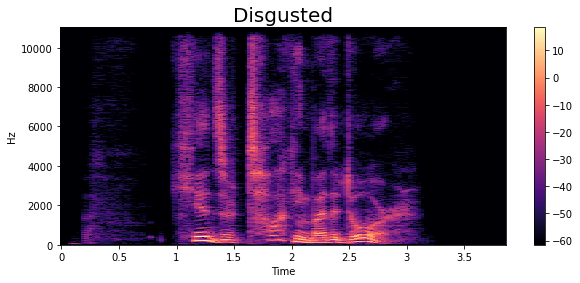

In [8]:
emotion = 'Disgusted'
path = 'Emotions/Disgusted/03-01-07-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

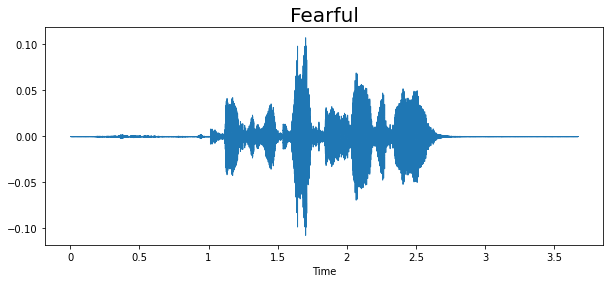

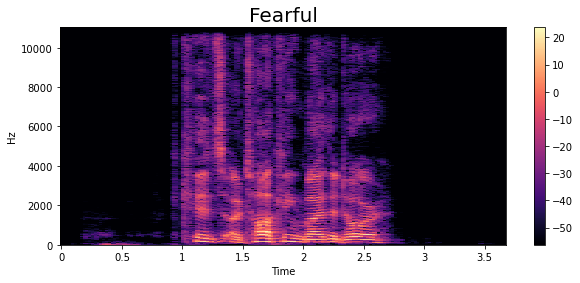

In [9]:
emotion = 'Fearful'
path = 'Emotions/Fearful/03-01-06-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

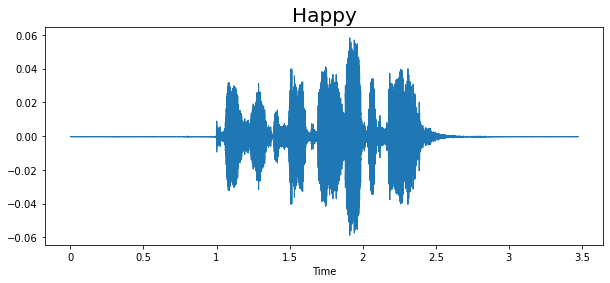

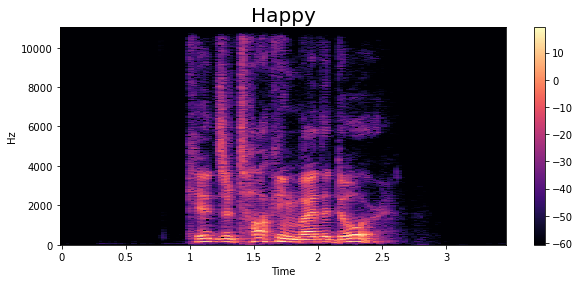

In [10]:
emotion = 'Happy'
path = 'Emotions/Happy/03-01-03-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

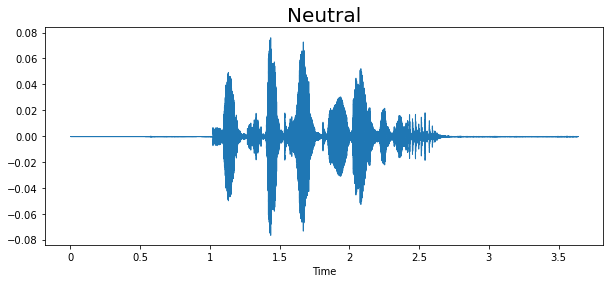

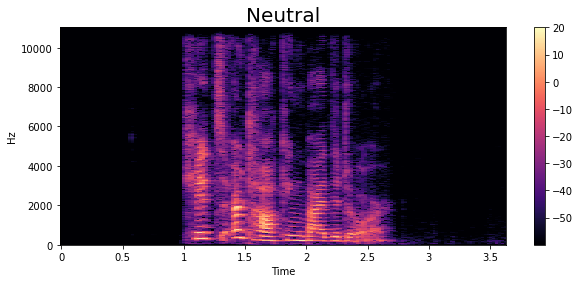

In [11]:
emotion = 'Neutral'
path = 'Emotions/Neutral/03-01-01-01-01-01-02.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

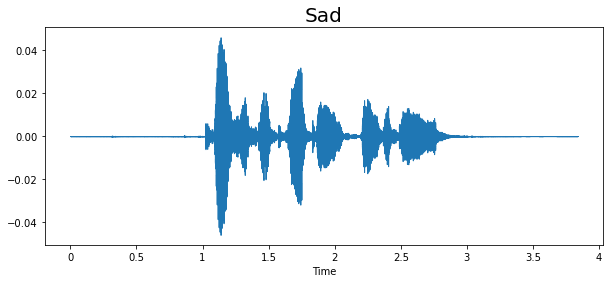

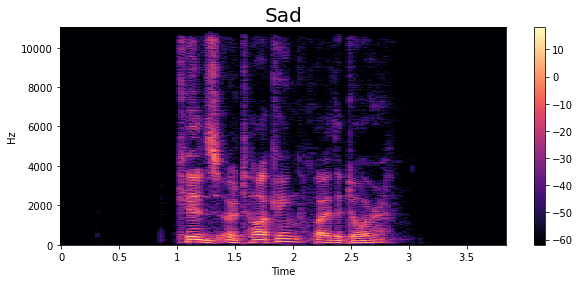

In [12]:
emotion = 'Sad'
path = 'Emotions/Sad/03-01-04-01-01-01-01.wav'
data, sampling_rate = librosa.load(path)
waveplot(data,sampling_rate, emotion)
spectogram(data,sampling_rate,emotion)
Audio(path)

In [12]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [14]:
# def extract_delta(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#     delta = np.mean(librosa.feature.delta(mfcc).T, axis=0)
#     return delta

In [15]:
# def extract_delta2(filename):
#     y, sr = librosa.load(filename, duration=3, offset=0.5)
#     mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40)
#     delta2 = np.mean(librosa.feature.delta(mfcc, order=2).T, axis=0)
#     return delta2

In [13]:
X_mfcc = df['file'].apply(lambda x: extract_mfcc(x))
X_mfcc

0        [-490.88266, 54.25925, -7.4870567, 15.928643, ...
1        [-526.7639, 52.98029, -13.038193, 7.2582326, -...
2        [-554.532, 75.44737, 2.6228604, 20.056547, 4.7...
3        [-521.82367, 42.11239, -13.007959, 4.1676183, ...
4        [-471.8216, 73.18985, -17.26226, 8.153219, 6.6...
                               ...                        
12201    [-406.48053, 80.379875, 32.462395, 46.579094, ...
12202    [-426.90918, 102.54756, 24.800041, 43.04809, 4...
12203    [-378.50494, 80.91062, 35.300533, 39.74792, -4...
12204    [-434.8618, 89.906364, 28.37326, 39.57707, -2....
12205    [-421.8341, 70.69788, 32.476387, 45.642555, 4....
Name: file, Length: 12206, dtype: object

In [17]:
# X_mfcc_delta = df['file'].apply(lambda x: extract_delta(x))
# X_mfcc_delta

In [18]:
# X_mfcc_delta2 = df['file'].apply(lambda x: extract_delta2(x))
# X_mfcc_delta2

In [14]:
X1 = [x for x in X_mfcc]
X1 = np.array(X1)
X1

array([[-4.9088266e+02,  5.4259251e+01, -7.4870567e+00, ...,
        -4.7193128e-01, -4.5563011e+00, -1.5693077e+00],
       [-5.2676392e+02,  5.2980289e+01, -1.3038193e+01, ...,
         1.7093302e+00,  6.4148974e-01,  9.3507600e-01],
       [-5.5453198e+02,  7.5447372e+01,  2.6228604e+00, ...,
        -3.2926991e+00, -5.5480242e+00, -2.1736970e+00],
       ...,
       [-3.7850494e+02,  8.0910622e+01,  3.5300533e+01, ...,
         6.4638782e+00,  4.5451474e+00,  7.0439358e+00],
       [-4.3486179e+02,  8.9906364e+01,  2.8373260e+01, ...,
         1.0526769e+01,  1.1808918e+01,  1.0119673e+01],
       [-4.2183411e+02,  7.0697884e+01,  3.2476387e+01, ...,
         5.0802121e+00,  5.1315765e+00,  6.3598347e+00]], dtype=float32)

In [15]:
mfcc = pd.DataFrame(X1,columns=[x for x in range(1,41)])
mfcc

,1,2,3,4,5,6,7,8,9,10,...,31,32,33,34,35,36,37,38,39,40
0,-490.882660,54.259251,-7.487057,15.928643,-1.853973,-3.762017,-5.567190,-1.998039,-15.838935,-6.187402,...,0.028552,-0.560545,-2.765480,-2.210116,-3.227792,-0.030125,-1.744964,-0.471931,-4.556301,-1.569308
1,-526.763916,52.980289,-13.038193,7.258233,-7.994300,-5.933783,-4.651824,-12.674568,-5.665134,-2.909221,...,-1.372314,3.370533,2.566688,3.450167,0.546662,1.748658,-1.036299,1.709330,0.641490,0.935076
2,-554.531982,75.447372,2.622860,20.056547,4.767845,-3.949522,-8.300060,-12.239655,-6.985273,-5.187912,...,-1.667873,-1.667470,-4.225702,-1.124747,-3.251144,0.083114,-4.654759,-3.292699,-5.548024,-2.173697
3,-521.823669,42.112389,-13.007959,4.167618,-11.537408,-9.458173,-9.039138,-16.746555,-10.106771,-6.264058,...,1.201717,1.897936,0.604426,-0.122943,-1.261978,0.337491,-0.585459,2.400822,2.955409,1.315660
4,-471.821594,73.189850,-17.262260,8.153219,6.645729,-17.770739,-6.850997,-4.655056,-10.153034,-6.864321,...,0.821179,1.407524,-1.147368,0.730866,-0.709438,3.432853,-0.580453,-0.899357,-3.205489,0.345790
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12201,-406.480530,80.379875,32.462395,46.579094,-1.683399,13.425336,3.121954,-12.444938,1.779502,-3.669046,...,0.664780,9.923697,6.552720,11.472416,3.039587,4.530210,1.182842,5.800232,5.091353,6.772975
12202,-426.909180,102.547562,24.800041,43.048092,4.635152,1.589418,-3.913076,-16.237940,3.517752,-13.348096,...,-6.544245,3.926087,0.441221,7.130212,9.293227,11.191388,11.764185,11.832008,8.662523,8.261909
12203,-378.504944,80.910622,35.300533,39.747921,-4.786337,7.230661,2.237550,-10.493016,3.315185,-7.648578,...,2.555938,11.403852,7.274485,8.324022,0.578673,2.331598,-2.193613,6.463878,4.545147,7.043936
12204,-434.861786,89.906364,28.373260,39.577068,-2.448975,17.433895,-0.950397,-15.767815,-0.184667,-4.836698,...,3.281015,11.347349,6.455436,12.226357,4.241483,4.372067,5.561799,10.526769,11.808918,10.119673


In [16]:
# from sklearn.preprocessing import StandardScaler

# # create a scaler object
# std_scaler = StandardScaler()
# std_scaler
# # fit and transform the data
# mfcc_std = pd.DataFrame(std_scaler.fit_transform(mfcc), columns=mfcc.columns)
# mfcc_std

In [17]:
mfcc.shape

(12206, 40)

In [18]:
X1 = np.expand_dims(mfcc,-1)
X1.shape

(12206, 40, 1)

In [19]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['class']])
y = y.toarray()
y
# y = df[['class_id']]
# y.shape

array([[1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1.]])

In [20]:
from sklearn.model_selection import train_test_split
X1_train, X1_test,y1_train, y1_test = train_test_split(X1,y,
                                   random_state=5, 
                                   test_size=0.20, 
                                   shuffle=True)
X1_train.shape,y1_train.shape

((9764, 40, 1), (9764, 6))

In [24]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout


model = Sequential([
    LSTM(40, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(6, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 40)                6720      
                                                                 
 dropout_8 (Dropout)         (None, 40)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               5248      
                                                                 
 dropout_9 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 64)                8256      
                                                                 
 dropout_10 (Dropout)        (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 32)               

In [27]:
# X_train, X_test,y_train, y_test = train_test_split(X,y ,
#                                    random_state=104, 
#                                    test_size=0.25, 
#                                    shuffle=True)

In [22]:
history = model.fit(X1_train, y1_train, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
123/123 [==============================] - 5s 25ms/step - loss: 1.7617 - accuracy: 0.2064 - val_loss: 1.6820 - val_accuracy: 0.2519
Epoch 2/50
123/123 [==============================] - 3s 21ms/step - loss: 1.6334 - accuracy: 0.2836 - val_loss: 1.5566 - val_accuracy: 0.3257
Epoch 3/50
123/123 [==============================] - 3s 22ms/step - loss: 1.5643 - accuracy: 0.3297 - val_loss: 1.4938 - val_accuracy: 0.3733
Epoch 4/50
123/123 [==============================] - 3s 21ms/step - loss: 1.5219 - accuracy: 0.3555 - val_loss: 1.4404 - val_accuracy: 0.3989
Epoch 5/50
123/123 [==============================] - 3s 21ms/step - loss: 1.4603 - accuracy: 0.3814 - val_loss: 1.3920 - val_accuracy: 0.4337
Epoch 6/50
123/123 [==============================] - 3s 22ms/step - loss: 1.4353 - accuracy: 0.4065 - val_loss: 1.5589 - val_accuracy: 0.3769
Epoch 7/50
123/123 [==============================] - 3s 21ms/step - loss: 1.4403 - accuracy: 0.3898 - val_loss: 1.3329 - val_accuracy: 0.4491

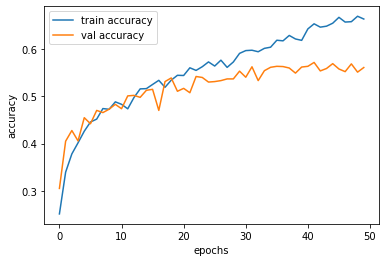

In [24]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

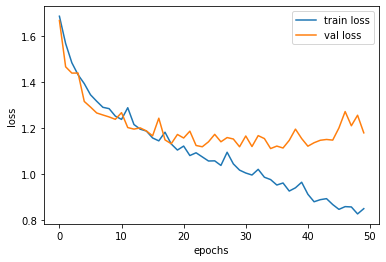

In [25]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [26]:
model.save('audio_model')

INFO:tensorflow:Assets written to: audio_model\assets


INFO:tensorflow:Assets written to: audio_model\assets
